In [435]:
import warnings
warnings.filterwarnings("ignore")

In [436]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('concatenated_final_dataset.csv')

# View the first few rows of the DataFrame
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,30358,5,MissedShots,0.923,0.464,0.141077,Leroy Sané,h,337,OpenPlay,2014,LeftFoot,5159,Schalke 04,VfB Stuttgart,3,2,5/2/2015 14:30,Leon Goretzka,Pass
1,30359,6,BlockedShot,0.764,0.427,0.012746,Roman Neustädter,h,346,OpenPlay,2014,RightFoot,5159,Schalke 04,VfB Stuttgart,3,2,5/2/2015 14:30,NaN,Aerial
2,30360,8,Goal,0.929,0.490,0.530869,Klaas-Jan Huntelaar,h,340,OpenPlay,2014,RightFoot,5159,Schalke 04,VfB Stuttgart,3,2,5/2/2015 14:30,NaN,BlockedPass
3,30362,13,MissedShots,0.829,0.555,0.075300,Dennis Aogo,h,334,OpenPlay,2014,RightFoot,5159,Schalke 04,VfB Stuttgart,3,2,5/2/2015 14:30,Klaas-Jan Huntelaar,Pass
4,30363,14,SavedShot,0.889,0.610,0.232375,Leroy Sané,h,337,OpenPlay,2014,LeftFoot,5159,Schalke 04,VfB Stuttgart,3,2,5/2/2015 14:30,Eric Maxim Choupo-Moting,TakeOn


In [437]:
#summary about the dataset before doing any work
print("summary about the dataset before doing any work")
df.describe()

summary about the dataset before doing any work


,id,minute,X,Y,xG,player_id,season,match_id,h_goals,a_goals
count,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000,383166.000000
mean,217260.527155,48.587857,0.842734,0.504506,0.107046,2982.664216,2017.237545,8412.551544,1.569959,1.240008
std,137133.401625,26.595792,0.090542,0.129536,0.159940,2393.996701,2.158535,5022.643772,1.329754,1.175850
min,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2014.000000,81.000000,0.000000,0.000000
25%,95933.250000,26.000000,0.779000,0.413000,0.023507,1109.000000,2015.000000,4112.000000,1.000000,0.000000
50%,199761.500000,49.000000,0.862000,0.501000,0.048984,2335.000000,2017.000000,8382.000000,1.000000,1.000000
75%,352512.750000,71.000000,0.908000,0.597000,0.093096,4552.000000,2019.000000,12540.000000,2.000000,2.000000
max,448682.000000,105.000000,1.000000,1.000000,0.979887,10153.000000,2021.000000,18001.000000,10.000000,9.000000


In [438]:
print("The unique values in the 'result' column:")
print(*df['result'].unique().tolist())

print("\nThe unique values in the 'situation' column:")
print(*df['situation'].unique().tolist())

print("\nThe unique values in the 'shotType' column:")
print(*df['shotType'].unique().tolist())

print("\nThe unique values in the 'lastAction' column:")
print(df['lastAction'].unique().tolist())

print("\nThe unique values in the 'h_a' column:")
print(df['h_a'].unique().tolist())

The unique values in the 'result' column:
MissedShots BlockedShot Goal SavedShot ShotOnPost OwnGoal

The unique values in the 'situation' column:
OpenPlay FromCorner SetPiece DirectFreekick Penalty

The unique values in the 'shotType' column:
LeftFoot RightFoot Head OtherBodyPart

The unique values in the 'lastAction' column:
['Pass', 'Aerial', 'BlockedPass', 'TakeOn', 'Chipped', nan, 'Rebound', 'Cross', 'BallRecovery', 'Standard', 'HeadPass', 'LayOff', 'BallTouch', 'Throughball', 'Dispossessed', 'KeeperPickup', 'Interception', 'Tackle', 'Foul', 'OffsidePass', 'End', 'Goal', 'CornerAwarded', 'Card', 'Challenge', 'Save', 'Start', 'Clearance', 'Punch', 'SubstitutionOn', 'FormationChange', 'GoodSkill', 'OffsideProvoked', 'Error', 'KeeperSweeper', 'PenaltyFaced', 'SubstitutionOff', 'ShieldBallOpp', 'ChanceMissed', 'Smother', 'CrossNotClaimed']

The unique values in the 'h_a' column:
['h', 'a']


In [439]:
# drop rows that have result: 'OwnGoal'
df = df[df['result'] != 'OwnGoal']

In [440]:
def distribution(cat_col):
  plt.figure(figsize=(21, 8))
  ax = sns.countplot(x=cat_col, data=df, hue=cat_col, order=df[cat_col].value_counts().index, )
  plt.title('Distribution of {}'.format(cat_col))
  # label each bar in the plot with the count of the y value
  for p in ax.patches:
      ax.annotate(f'{int(p.get_height())}', (p.get_x()+0.4, p.get_height()), xytext=(0, 5), textcoords='offset points', ha='center')
  plt.xticks(rotation=90)

  plt.show()

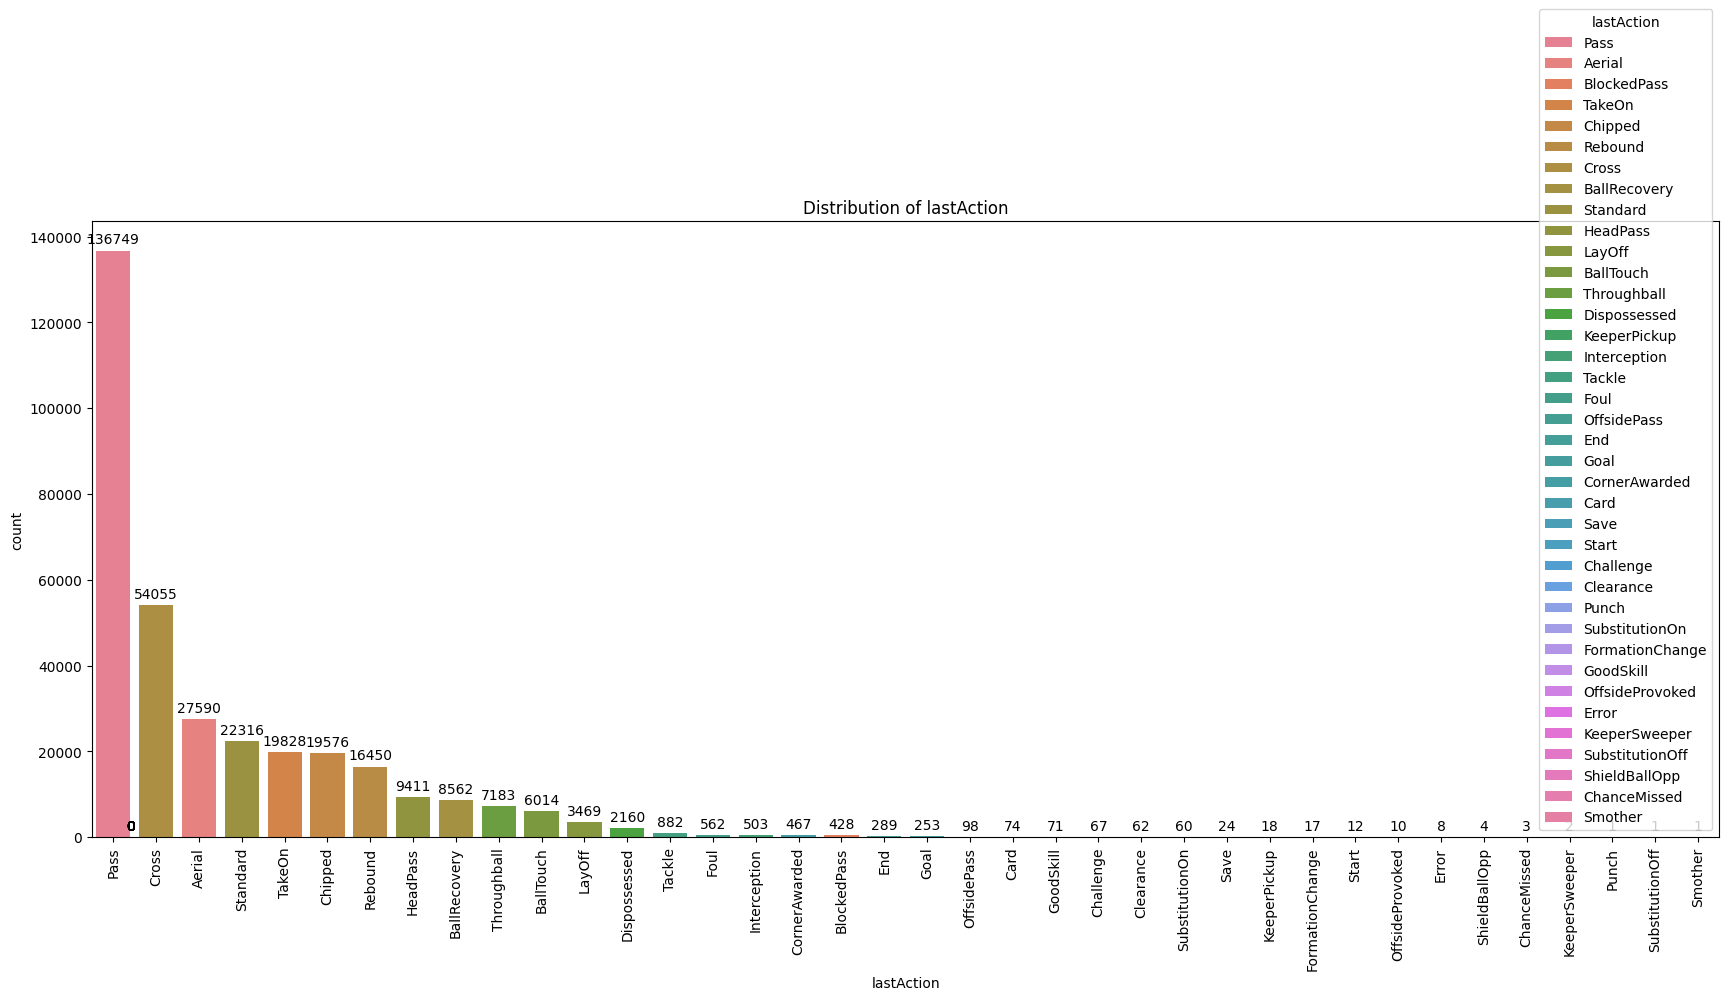

In [441]:
distribution('lastAction')


91% of the lastAction column is represented by 10 unique values.

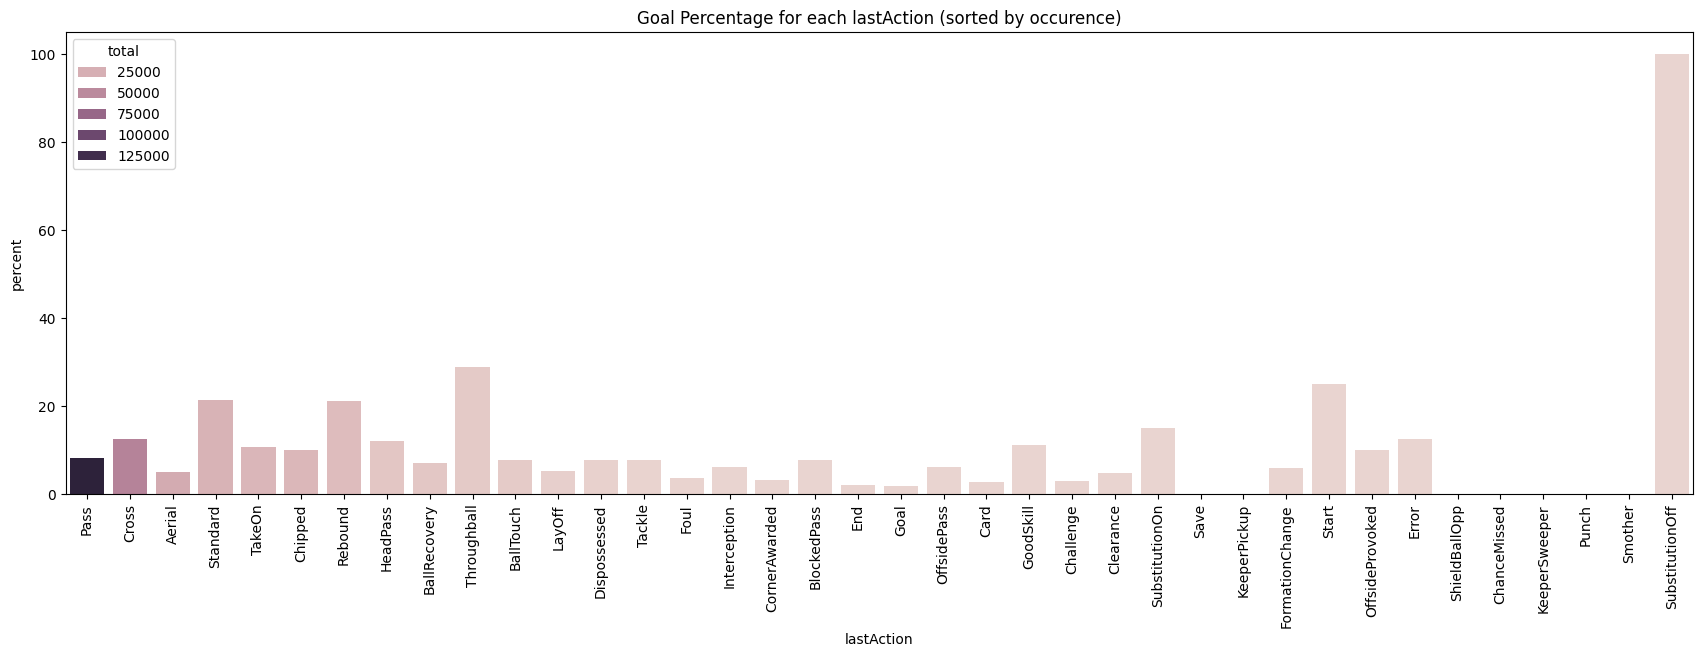

In [442]:


# plot each lastAction goal percentage

new_df = pd.DataFrame(columns=['lastAction', 'result', 'counts', 'total', 'proportion'])
new_df['lastAction'] = df['lastAction']
new_df['result'] = df['result'] == 'Goal'
new_df = new_df.astype({'result': 'int'})

new_df = new_df.groupby('lastAction').agg({'result': 'sum', 'lastAction': 'count'})
new_df.columns = ['goals', 'total']

new_df['percent'] = (new_df['goals'] / new_df['total']) * 100

plt.figure(figsize=(21, 6))
ax = sns.barplot(x=new_df.index, y=new_df['percent'], order=new_df.sort_values('total', ascending=False).index, hue=new_df['total'])
plt.title('Goal Percentage for each lastAction (sorted by occurence)')
plt.xticks(rotation=90)
plt.show()



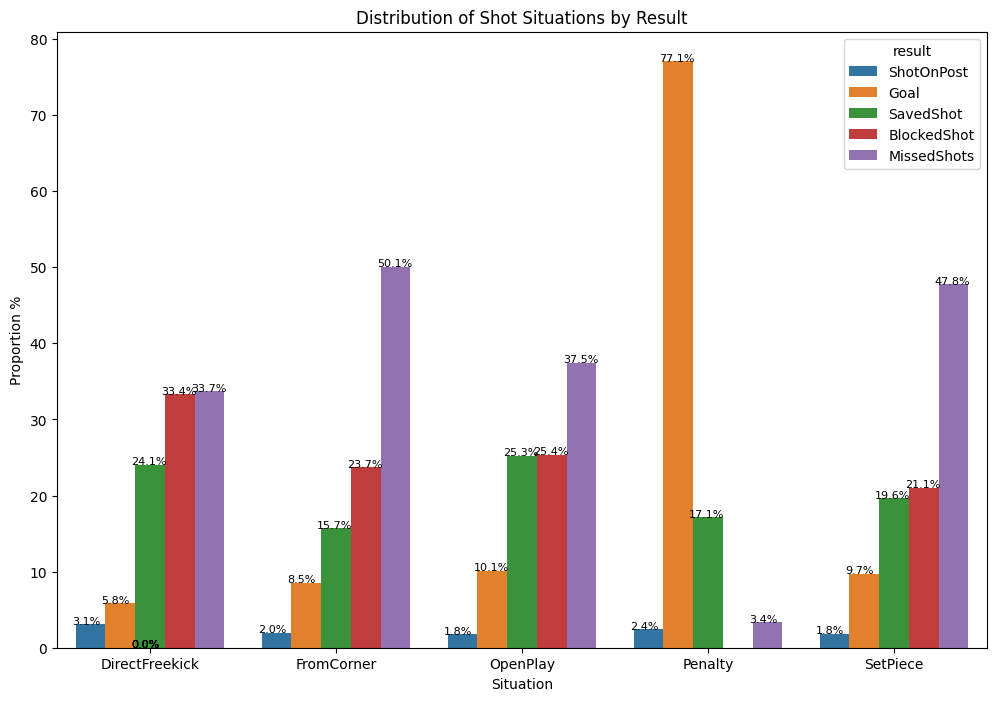

In [443]:
# Create a new DataFrame to store the counts
df_counts = df.groupby(['situation', 'result']).size().reset_index(name='counts')

# Calculate the total number of rows in the DataFrame for each result
df_total = df.groupby('situation').size().reset_index(name='total')

# Merge the two DataFrames
df_counts = pd.merge(df_counts, df_total, on='situation')

# Calculate the proportion of each situation in each result
df_counts['proportion'] = df_counts['counts'] / df_counts['total'] * 100
# sort each result of each situation by the proportion
df_counts = df_counts.sort_values(by=['situation', 'proportion'])
# Plot the distribution of 'situation' by 'result'
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='situation', y='proportion', hue='result', data=df_counts)
plt.title('Distribution of Shot Situations by Result')
plt.xlabel('Situation')
plt.ylabel('Proportion %')
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_y() + p.get_height()  
    ax.annotate(percentage, (x, y), size = 8)
plt.show()


We conclude that on average, if the result of the shot is a `Goal`, 

In [444]:
# print columns of the dataset and their data types
print("Columns of the dataset and their data types:")
print(df.dtypes)

Columns of the dataset and their data types:
id                   int64
minute               int64
result              object
X                  float64
Y                  float64
xG                 float64
player              object
h_a                 object
player_id            int64
situation           object
season               int64
shotType            object
match_id             int64
h_team              object
a_team              object
h_goals              int64
a_goals              int64
date                object
player_assisted     object
lastAction          object
dtype: object


In [445]:
# drop player	h_a	player_id id season match_id h_team	a_team date
df = df.drop(['player', 'player_id', 'id', 'season', 'match_id', 'h_team', 'a_team', 'date'], axis=1)

# replace player_assisted by true if it is not NaN else false*
df['assist'] = df['player_assisted'].notnull()
df['assist'] = df['assist'].replace({True: 1, False: 0})
df = df.drop('player_assisted', axis=1)


# drop each row where 'lastAction' has an occurrence of less than .5% of the total number of rows in the DataFrame
df = df.groupby('lastAction').filter(lambda x: len(x) > 700)

In [446]:
# Calculate the probability of 'Goal' for each 'lastAction'
goal_probabilities = df.groupby('lastAction')['result'].apply(lambda x: (x == 'Goal').mean())

# Fill missing values with the overall mean probability of 'Goal'
overall_goal_probability = (df['result'] == 'Goal').mean()
goal_probabilities.fillna(overall_goal_probability, inplace=True)

df['lastAction_Goal_Probability_%'] = df['lastAction'].map(goal_probabilities * 100)

df = df.drop('lastAction', axis=1)

In [447]:
# replace h_a by true if it is 'h' else false, rename the column to 'home'
df['home'] = df['h_a'] == 'h'
df['home'] = df['home'].replace({True: 1, False: 0})
df = df.drop('h_a', axis=1)

In [448]:

onehot_encoded = pd.get_dummies(df['shotType'], prefix='shotType')
df = pd.concat([df, onehot_encoded], axis=1)
df = df.drop('shotType', axis=1)
df = df.drop(df[df['shotType_OtherBodyPart'] == 1].index)
df = df.drop('shotType_OtherBodyPart', axis=1)

In [449]:
df['isGoal'] = df['result'] == 'Goal'
df.drop('result', axis=1, inplace=True)

In [450]:
# replace all True values by 1 and all False values by 0
df = df.replace({True: 1, False: 0})
df.dropna(inplace=True)
# replace situation column by the percentage of goals scored in that situation
situation_goal_percent = df.groupby('situation')['isGoal'].mean() * 100
df['situation_goal_percent'] = df['situation'].map(situation_goal_percent)

df = df.drop('situation', axis=1)
# drop rows where shotType_OtherBodyPart is 1 then remove the column
df

,minute,X,Y,xG,h_goals,a_goals,assist,lastAction_Goal_Probability_%,home,shotType_Head,shotType_LeftFoot,shotType_RightFoot,isGoal,situation_goal_percent
0,5,0.923,0.464,0.141077,3,2,1,8.282327,1,0,1,0,0,10.329383
1,6,0.764,0.427,0.012746,3,2,0,5.001812,1,0,0,1,0,10.329383
3,13,0.829,0.555,0.075300,3,2,1,8.282327,1,0,0,1,0,10.329383
4,14,0.889,0.610,0.232375,3,2,1,10.767601,1,0,1,0,0,10.329383
5,23,0.943,0.319,0.051746,3,2,1,10.083776,1,0,0,1,0,10.329383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383160,69,0.735,0.482,0.054789,1,2,0,21.365836,0,0,0,1,0,5.844267
383161,79,0.913,0.578,0.127258,1,2,1,8.282327,0,0,0,1,0,10.329383
383163,88,0.888,0.361,0.080335,1,2,1,8.282327,0,0,0,1,0,10.329383
383164,91,0.793,0.386,0.031638,1,2,1,8.282327,0,0,0,1,0,10.329383


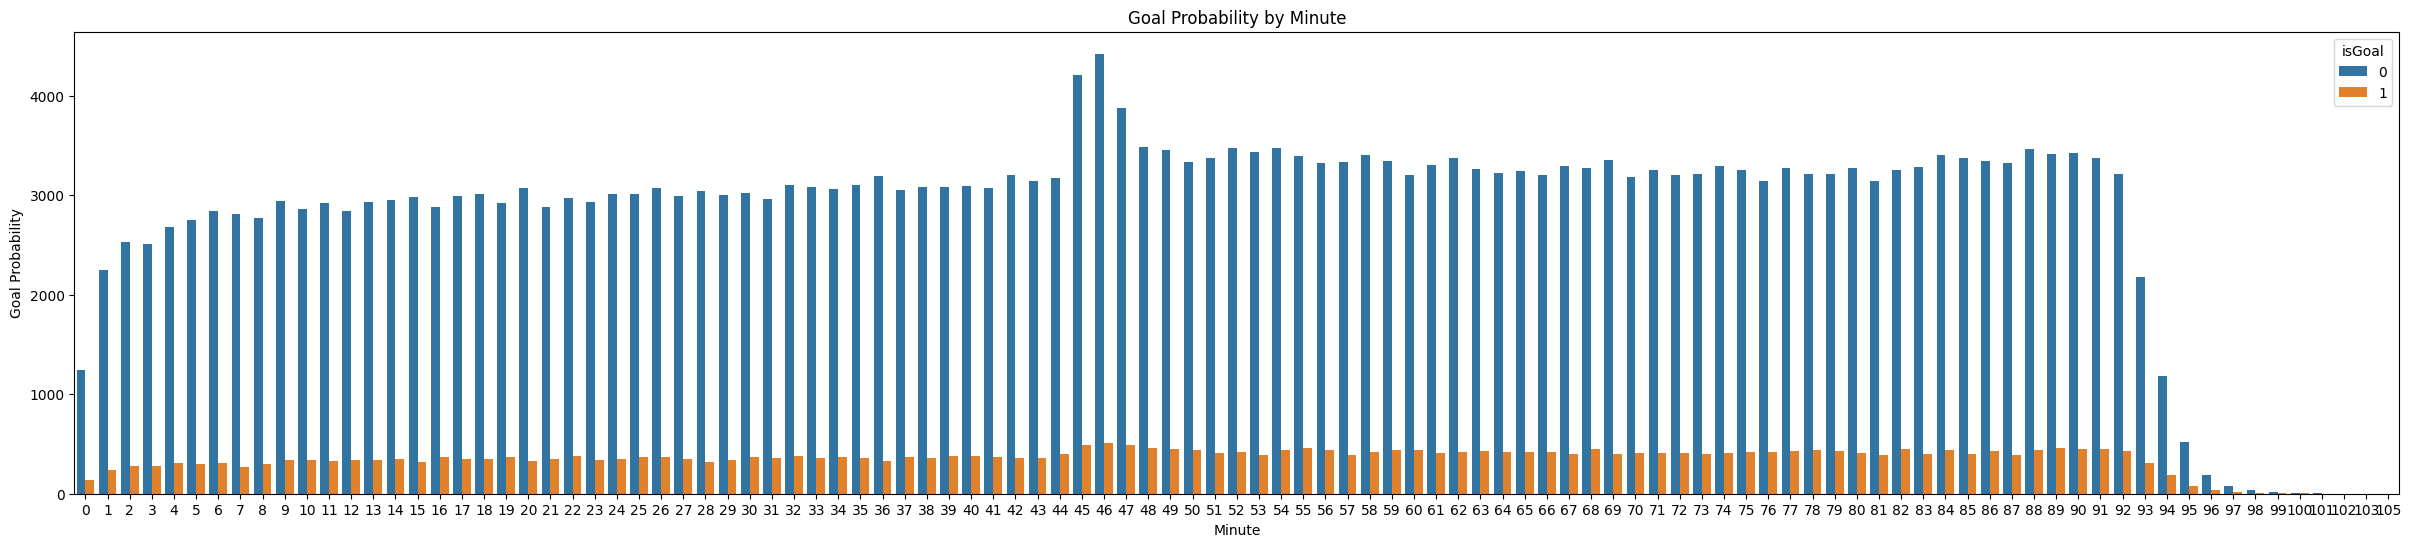

In [451]:
# plot graph of x: minutes, y: isGoal
plt.figure(figsize=(30, 6))
sns.countplot(x='minute', hue='isGoal', data=df, order=df['minute'].sort_values().unique())
plt.title('Goal Probability by Minute')
plt.xlabel('Minute')
plt.ylabel('Goal Probability')
plt.show()

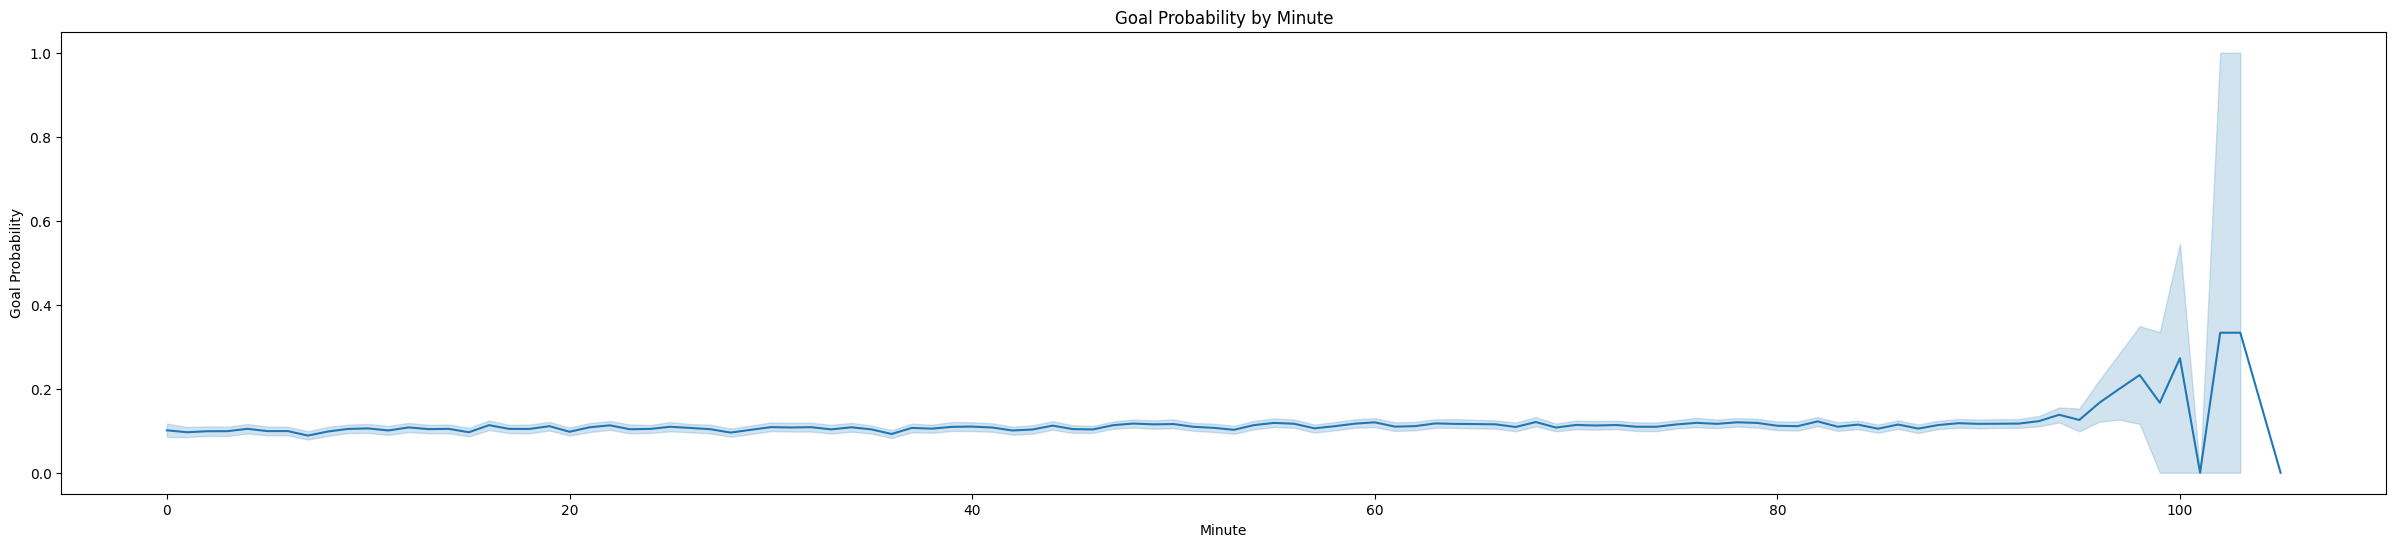

In [452]:
# plot graph of x: minutes, y: isGoal
plt.figure(figsize=(30, 6))
sns.lineplot(x='minute', y='isGoal', data=df)
plt.title('Goal Probability by Minute')
plt.xlabel('Minute')
plt.ylabel('Goal Probability')
plt.show()

Up until around minude 90', the probability to score is relatively constant, we can squish all the range into a bin for before 90, and 15 for after 90.

In [453]:
# Up until around minude 90', the probability to score is relatively constant, we can squish all the range into a bin for before 90, and 15 for after 90.
bins = [-1] + [ 90 + i for i in range(0, 31, 2)]
df['minute'] = pd.cut(df['minute'], bins=bins, labels=bins[1:])
df['minute'].value_counts()

minute
90     320820
92       7447
94       3859
96        811
98        138
100        29
102         8
104         3
106         1
108         0
110         0
112         0
114         0
116         0
118         0
120         0
Name: count, dtype: int64

In [454]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
def feature_engineering(df):
    # Define a function to calculate XDTGi (Distance To Goal)
    def calculate_XDTGi(X, Y):
        x = 120 - X * 120
        y = Y * 90
        dy = np.abs(y - 45)
        return np.sqrt(x * x + dy * dy)

    # Define a function to calculate XATGi (Angle To Goal)
    def calculate_openAngle(X, Y):
        # meters
        x = 120 - X * 120
        y = Y * 90
        dy = np.abs(y - 45)

        a = np.arctan(x / np.abs(dy - (7.32 / 2)))% (np.pi * 2) 
        b = np.arctan(x / np.abs(dy + (7.32 / 2)))% (np.pi * 2) 
        # if y < 7.32 / 2, then the angle is 180 - (a+b) else its abs(a-b)
        open_angle = np.where(dy < 7.32 / 2, np.pi - (a + b), np.abs(a - b))
        open_angle = np.abs(open_angle * (180 / np.pi))

        return open_angle

    # Apply the functions to the dataset using .loc
    df.loc[:, 'XDTGi'] = calculate_XDTGi(df['X'], df['Y'])
    df.loc[:, 'openAngle'] = calculate_openAngle(df['X'], df['Y'])

    # Apply label encoding to object type columns
    label_encoder = LabelEncoder()
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = label_encoder.fit_transform(df[column])

    return df


In [455]:
df = feature_engineering(df)

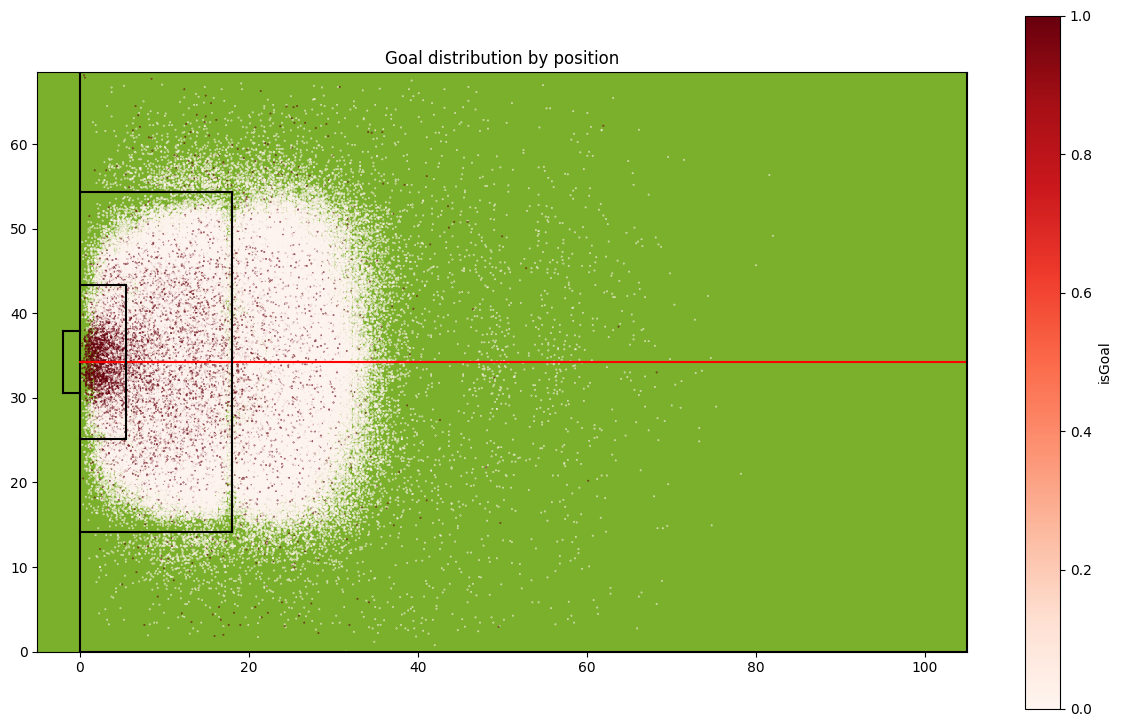

In [456]:
plt.figure(figsize=(15, 9))
# border
plt.plot([0, 0], [0, 68.5], 'k')
plt.plot([0, 105], [68.5, 68.5], 'k')
plt.plot([0, 105], [34.25, 34.25], 'k', c='r')
plt.plot([105, 105], [68.5, 0], 'k')
plt.plot([105, 0], [0, 0], 'k')
# goal
plt.plot([0, -2], [34.25 - 7.32 / 2, 34.25 - 7.32 / 2], 'k')
plt.plot([0, -2], [34.25 + 7.32 / 2, 34.25 + 7.32 / 2], 'k')
plt.plot([-2, -2], [34.25 - 7.32 / 2, 34.25 + 7.32 / 2], 'k')

# around
plt.plot([0, 5.5],  [34.25 - ( 5.5 + 7.32 / 2), 34.25 - ( 5.5 + 7.32 / 2)], 'k')
plt.plot([0, 5.5],  [34.25 + ( 5.5 + 7.32 / 2), 34.25 + ( 5.5 + 7.32 / 2)], 'k')
plt.plot([5.5, 5.5], [34.25 - ( 5.5 + 7.32 / 2), 34.25 + ( 5.5 + 7.32 / 2)], 'k')
# around
plt.plot([0, 18],  [34.25 - ( 5.5+11 + 7.32 / 2), 34.25 - ( 5.5+11 + 7.32 / 2)], 'k')
plt.plot([0, 18],  [34.25 + ( 5.5+11 + 7.32 / 2), 34.25 + ( 5.5+11 + 7.32 / 2)], 'k')
plt.plot([18, 18], [34.25 - ( 5.5+11 + 7.32 / 2), 34.25 + ( 5.5+11 + 7.32 / 2)], 'k')

x = 105 - df['X'] * 105
y = df['Y'] * 68.5
plt.scatter(x, y, c=df['isGoal'], cmap='Reds', marker='o', s=0.1) # s = size of the dots, alpha = transparency

# show label
plt.title('Goal distribution by position')
plt.colorbar(label='isGoal')
# set plot backgroud to green
plt.xlim(-5, 105)
plt.ylim(0, 68.5)
plt.gca().set_facecolor('#7bb02c')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


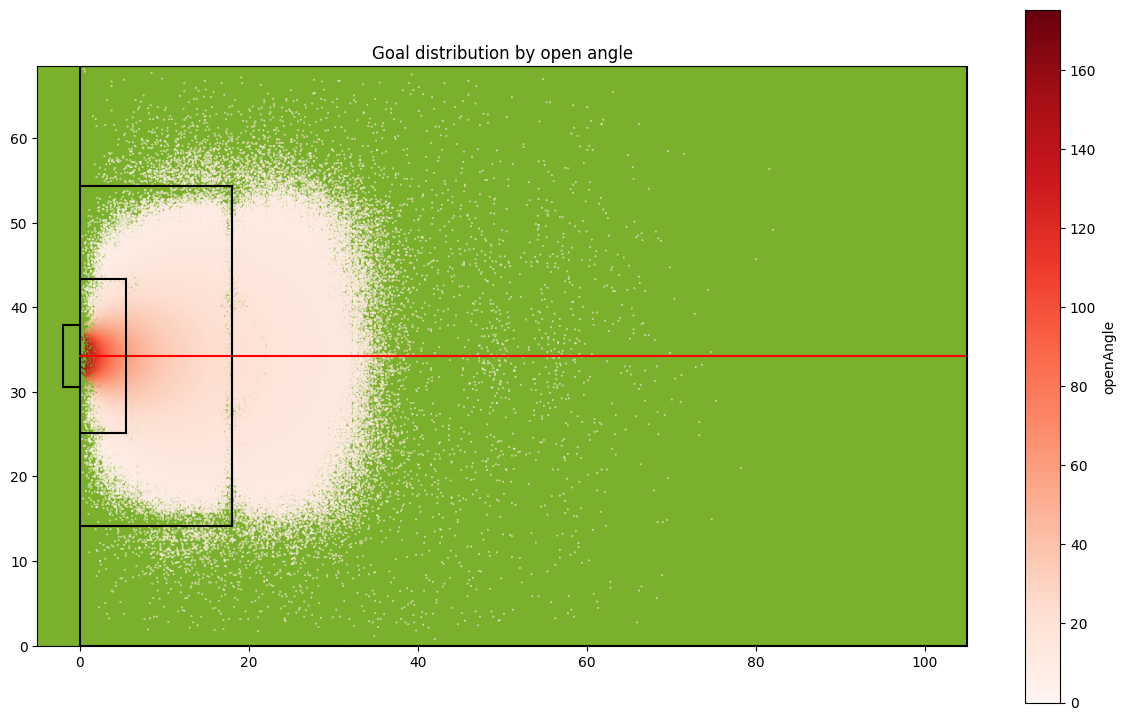

In [457]:
plt.figure(figsize=(15, 9))
# border
plt.plot([0, 0], [0, 68.5], 'k')
plt.plot([0, 105], [68.5, 68.5], 'k')
plt.plot([0, 105], [34.25, 34.25], 'k', c='r')
plt.plot([105, 105], [68.5, 0], 'k')
plt.plot([105, 0], [0, 0], 'k')
# goal
plt.plot([0, -2], [34.25 - 7.32 / 2, 34.25 - 7.32 / 2], 'k')
plt.plot([0, -2], [34.25 + 7.32 / 2, 34.25 + 7.32 / 2], 'k')
plt.plot([-2, -2], [34.25 - 7.32 / 2, 34.25 + 7.32 / 2], 'k')

# around
plt.plot([0, 5.5],  [34.25 - ( 5.5 + 7.32 / 2), 34.25 - ( 5.5 + 7.32 / 2)], 'k')
plt.plot([0, 5.5],  [34.25 + ( 5.5 + 7.32 / 2), 34.25 + ( 5.5 + 7.32 / 2)], 'k')
plt.plot([5.5, 5.5], [34.25 - ( 5.5 + 7.32 / 2), 34.25 + ( 5.5 + 7.32 / 2)], 'k')
# around
plt.plot([0, 18],  [34.25 - ( 5.5+11 + 7.32 / 2), 34.25 - ( 5.5+11 + 7.32 / 2)], 'k')
plt.plot([0, 18],  [34.25 + ( 5.5+11 + 7.32 / 2), 34.25 + ( 5.5+11 + 7.32 / 2)], 'k')
plt.plot([18, 18], [34.25 - ( 5.5+11 + 7.32 / 2), 34.25 + ( 5.5+11 + 7.32 / 2)], 'k')

x = 105 - df['X'] * 105
y = df['Y'] * 68.5
plt.scatter(x, y, c=df['openAngle'], cmap='Reds', marker='o', s=0.1) # s = size of the dots, alpha = transparency

# show label
plt.title('Goal distribution by open angle')
plt.colorbar(label='openAngle')
# set plot backgroud to green
plt.xlim(-5, 105)
plt.ylim(0, 68.5)
plt.gca().set_facecolor('#7bb02c')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [458]:
df.describe()

,X,Y,xG,h_goals,a_goals,assist,lastAction_Goal_Probability_%,home,shotType_Head,shotType_LeftFoot,shotType_RightFoot,isGoal,situation_goal_percent,XDTGi,openAngle
count,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000
mean,0.847391,0.505003,0.110700,1.575595,1.241892,0.828216,10.952568,0.548692,0.185806,0.305212,0.508982,0.109343,10.934329,21.705524,20.349712
std,0.078658,0.130232,0.162091,1.334678,1.178464,0.377193,5.161492,0.497624,0.388951,0.460498,0.499920,0.312070,8.119782,9.534966,13.013896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.001812,0.000000,0.000000,0.000000,0.000000,0.000000,5.844267,0.371083,0.000000
25%,0.783000,0.413000,0.024782,1.000000,0.000000,1.000000,8.282327,0.000000,0.000000,0.000000,0.000000,0.000000,10.329383,13.800000,11.812041
50%,0.866000,0.501000,0.050962,1.000000,1.000000,1.000000,8.282327,1.000000,0.000000,0.000000,1.000000,0.000000,10.329383,20.540080,15.503893
75%,0.909000,0.598000,0.097605,2.000000,2.000000,1.000000,12.627879,1.000000,0.000000,1.000000,1.000000,0.000000,10.329383,29.458719,25.685728
max,1.000000,1.000000,0.979887,10.000000,9.000000,1.000000,28.901573,1.000000,1.000000,1.000000,1.000000,1.000000,77.103477,128.160056,175.331658


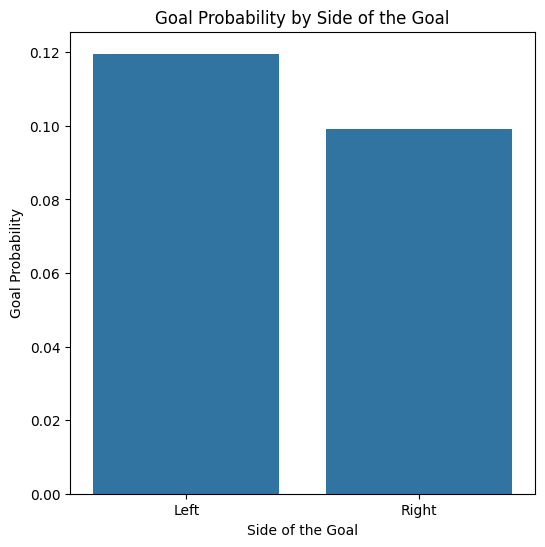

In [459]:
# plot the side of the shot ( left or right of the goal) vs the goal probability (use 'XXDTGi' and 'XATGi')

new_df = df[['X', 'Y', 'isGoal']].copy()
# make new column 'side' that is 1 if X is greater than 0.5 else 0
new_df['side'] = new_df['Y'] > 0.5
new_df['side'] = new_df['side'].replace({True:'Right', False:'Left'})
# drop X and Y columns
new_df = new_df.drop(['X', 'Y'], axis=1)
# group by side and calculate the mean of isGoal
new_df = new_df.groupby('side').mean()
# plot the graph
plt.figure(figsize=(6, 6))
sns.barplot(x=new_df.index, y=new_df['isGoal'])
plt.title('Goal Probability by Side of the Goal')
plt.xlabel('Side of the Goal')
plt.ylabel('Goal Probability')
plt.show()



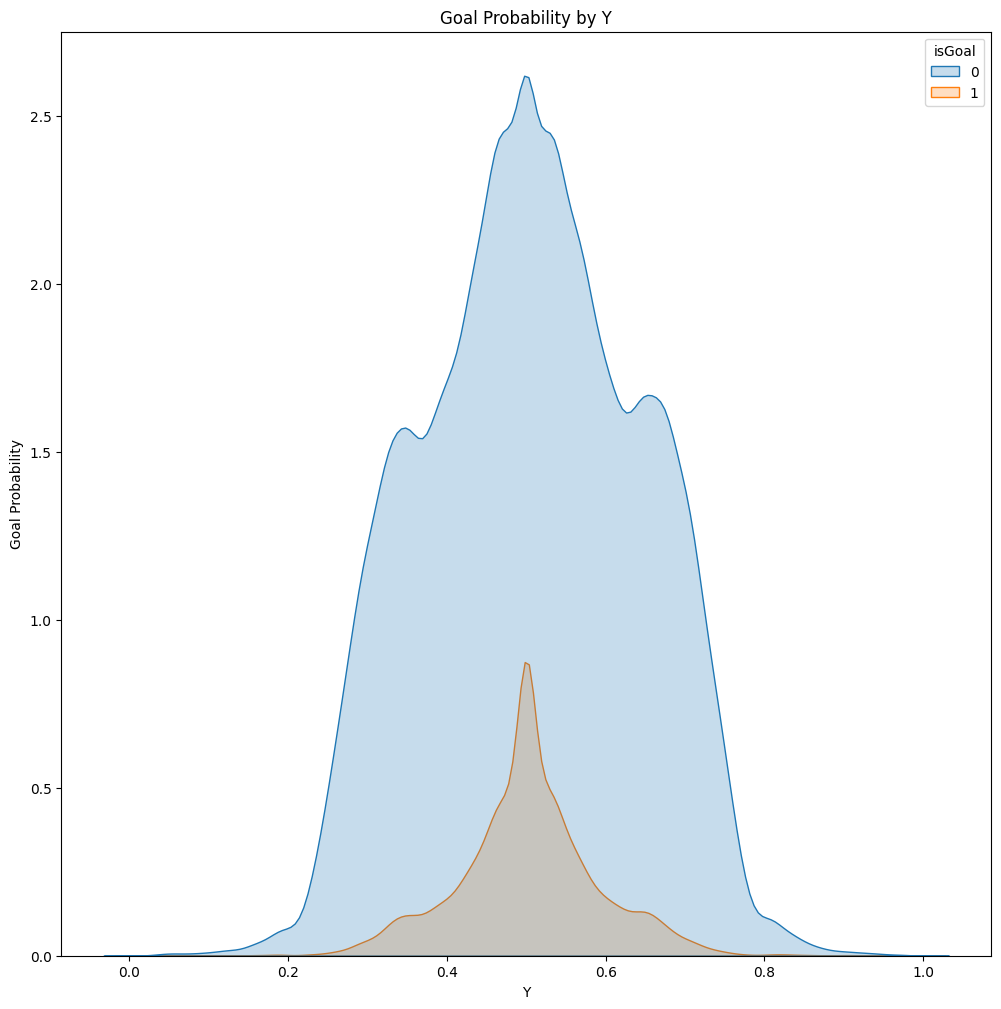

In [460]:
# PLOT X by IsGoal
plt.figure(figsize=(12,12))
sns.kdeplot(x='Y', data=df, hue='isGoal', fill=True)
plt.title('Goal Probability by Y')
plt.xlabel('Y')
plt.ylabel('Goal Probability')
plt.show()

The graph is symmetric around the axis Y=0.5

In [461]:
# make Y column values between 0 and 1 (symmetric around 0.5)
df['Y'] = np.where(df['Y'] < 0.5, (0.5 - df['Y']) / 0.5, (df['Y'] - 0.5) / 0.5)

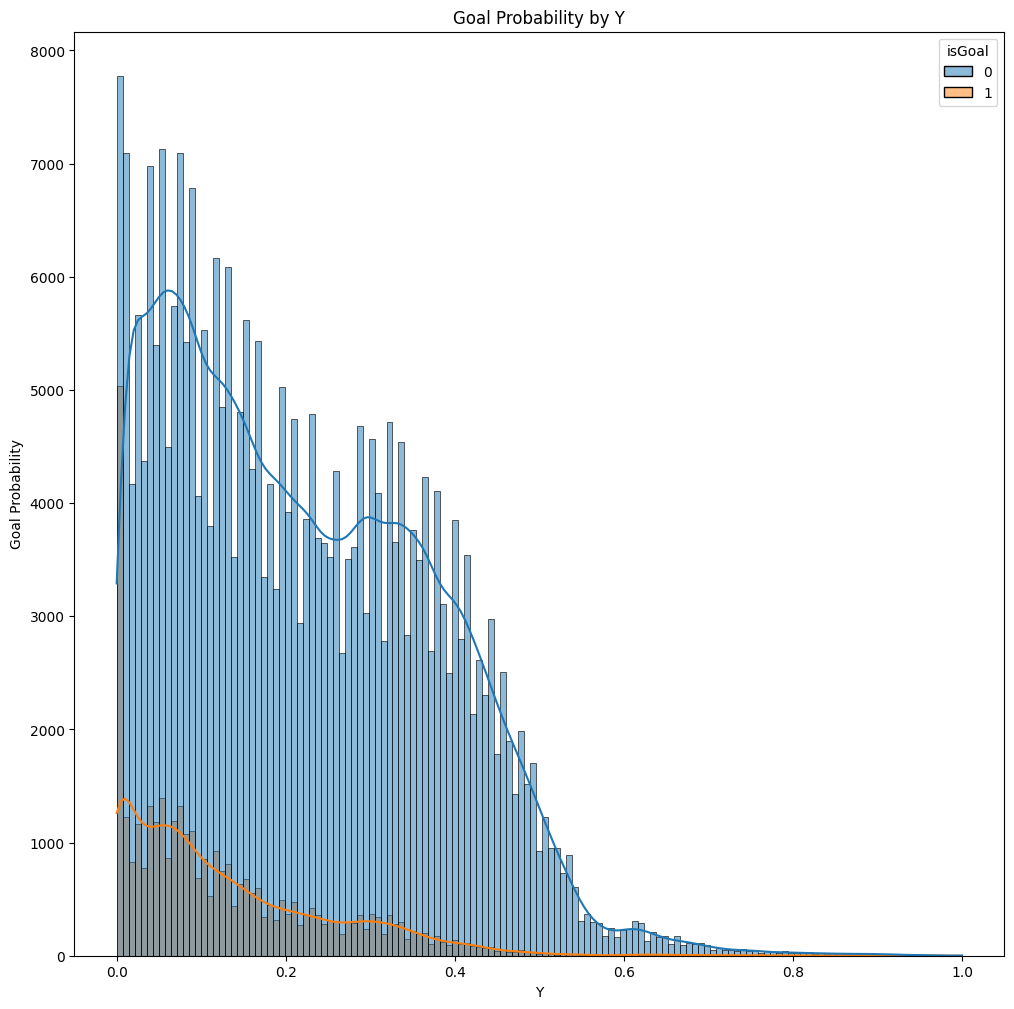

In [462]:
# PLOT X by IsGoal
plt.figure(figsize=(12,12))

sns.histplot(x='Y', data=df, hue='isGoal', fill=True, kde=True)
plt.title('Goal Probability by Y')
plt.xlabel('Y')
plt.ylabel('Goal Probability')
plt.show()

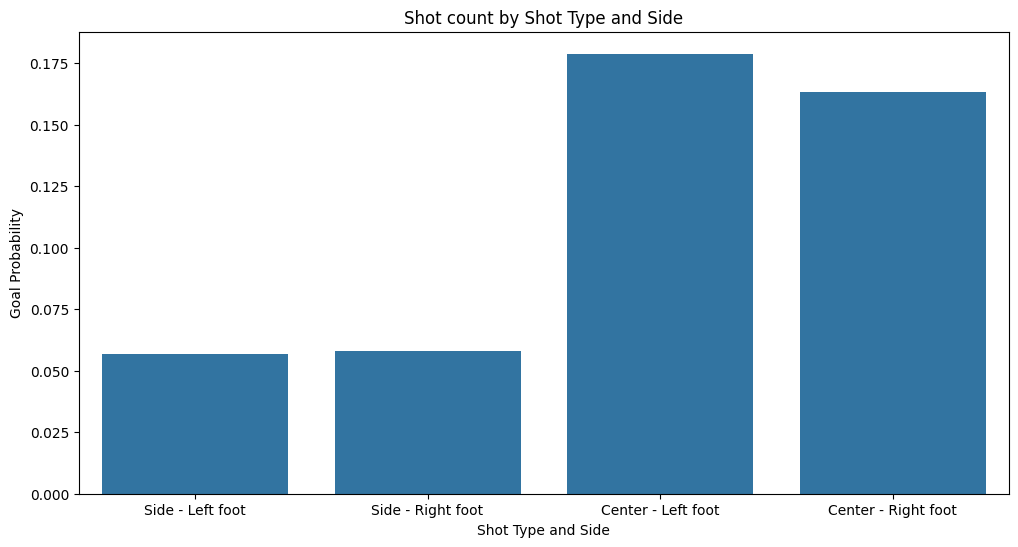

In [463]:
new_df = df[['shotType_LeftFoot', 'shotType_RightFoot', 'Y', 'isGoal']].copy()

new_df['side'] = new_df['Y'] > 0.2

new_df = new_df.drop('Y', axis=1)

new_df['side__right_foot'] = (new_df['shotType_RightFoot'] & (new_df['side']==True)).replace({True: 1, False: 0})
new_df['side__left_foot'] =    (new_df['shotType_LeftFoot'] & (new_df['side']==True)).replace({True: 2, False: 0})
new_df['center_side__left_foot'] =   (new_df['shotType_LeftFoot'] & (new_df['side']==False)).replace({True: 3, False: 0})
new_df['center_side__right_foot'] =  (new_df['shotType_RightFoot'] & (new_df['side']==False)).replace({True: 4, False: 0})
new_df = new_df.drop(['shotType_LeftFoot', 'shotType_RightFoot', 'side'], axis=1)
new_df = new_df.reset_index()

new_df['side__foot'] = new_df['side__right_foot'] + new_df['side__left_foot'] + new_df['center_side__left_foot'] + new_df['center_side__right_foot']
new_df = new_df.drop(['side__right_foot', 'side__left_foot','center_side__left_foot', 'center_side__right_foot'], axis=1)
new_df['side__foot'] = new_df['side__foot'].replace({1: 'Side - Right foot', 2: 'Side - Left foot', 3: 'Center - Right foot', 4: 'Center - Left foot'})

new_df = new_df.groupby('side__foot').mean()
new_df = new_df.reset_index()
new_df = new_df.drop('index', axis=1)
new_df = new_df[new_df['side__foot'] != 0]

#  rearrange the columns to be in the order of the side of the goal
new_df = new_df.reindex([3, 4, 1, 2, 5, 6])
plt.figure(figsize=(12, 6))
sns.barplot(x=new_df['side__foot'], y=new_df['isGoal'])
plt.title('Shot count by Shot Type and Side')
plt.xlabel('Shot Type and Side')
plt.ylabel('Goal Probability')
plt.show()




In [464]:
# add columns shotFromCenter and shotFromSides
margin_center = 0.2
df['shotFromCenter'] = df['Y'] >( 1 - margin_center)
# df = df.drop('X', axis=1)

In [465]:
df['shotFromCenter'] = df['shotFromCenter'].replace({True: 1, False: 0})


In [466]:
df.describe()

,X,Y,xG,h_goals,a_goals,assist,lastAction_Goal_Probability_%,home,shotType_Head,shotType_LeftFoot,shotType_RightFoot,isGoal,situation_goal_percent,XDTGi,openAngle,shotFromCenter
count,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000
mean,0.847391,0.210896,0.110700,1.575595,1.241892,0.828216,10.952568,0.548692,0.185806,0.305212,0.508982,0.109343,10.934329,21.705524,20.349712,0.001201
std,0.078658,0.153180,0.162091,1.334678,1.178464,0.377193,5.161492,0.497624,0.388951,0.460498,0.499920,0.312070,8.119782,9.534966,13.013896,0.034632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.001812,0.000000,0.000000,0.000000,0.000000,0.000000,5.844267,0.371083,0.000000,0.000000
25%,0.783000,0.080000,0.024782,1.000000,0.000000,1.000000,8.282327,0.000000,0.000000,0.000000,0.000000,0.000000,10.329383,13.800000,11.812041,0.000000
50%,0.866000,0.186000,0.050962,1.000000,1.000000,1.000000,8.282327,1.000000,0.000000,0.000000,1.000000,0.000000,10.329383,20.540080,15.503893,0.000000
75%,0.909000,0.326000,0.097605,2.000000,2.000000,1.000000,12.627879,1.000000,0.000000,1.000000,1.000000,0.000000,10.329383,29.458719,25.685728,0.000000
max,1.000000,1.000000,0.979887,10.000000,9.000000,1.000000,28.901573,1.000000,1.000000,1.000000,1.000000,1.000000,77.103477,128.160056,175.331658,1.000000


In [467]:
df['minute'] = df['minute'].astype('int')

df.describe()

,minute,X,Y,xG,h_goals,a_goals,assist,lastAction_Goal_Probability_%,home,shotType_Head,shotType_LeftFoot,shotType_RightFoot,isGoal,situation_goal_percent,XDTGi,openAngle,shotFromCenter
count,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000,333116.000000
mean,90.110304,0.847391,0.210896,0.110700,1.575595,1.241892,0.828216,10.952568,0.548692,0.185806,0.305212,0.508982,0.109343,10.934329,21.705524,20.349712,0.001201
std,0.625672,0.078658,0.153180,0.162091,1.334678,1.178464,0.377193,5.161492,0.497624,0.388951,0.460498,0.499920,0.312070,8.119782,9.534966,13.013896,0.034632
min,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.001812,0.000000,0.000000,0.000000,0.000000,0.000000,5.844267,0.371083,0.000000,0.000000
25%,90.000000,0.783000,0.080000,0.024782,1.000000,0.000000,1.000000,8.282327,0.000000,0.000000,0.000000,0.000000,0.000000,10.329383,13.800000,11.812041,0.000000
50%,90.000000,0.866000,0.186000,0.050962,1.000000,1.000000,1.000000,8.282327,1.000000,0.000000,0.000000,1.000000,0.000000,10.329383,20.540080,15.503893,0.000000
75%,90.000000,0.909000,0.326000,0.097605,2.000000,2.000000,1.000000,12.627879,1.000000,0.000000,1.000000,1.000000,0.000000,10.329383,29.458719,25.685728,0.000000
max,106.000000,1.000000,1.000000,0.979887,10.000000,9.000000,1.000000,28.901573,1.000000,1.000000,1.000000,1.000000,1.000000,77.103477,128.160056,175.331658,1.000000


In [468]:
# normalize minutes
df['minute'] = (df['minute'] - df['minute'].min()) / (df['minute'].max() - df['minute'].min())

In [469]:
# export the dataset to a new CSV file
df.drop(['X', 'Y'], axis=1, inplace=True)
df.to_csv('preprocessed_dataset.csv', index=False)